In [2]:
import os
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

from   astropy.table import Table
from   smith_kcorr import test_plots, test_nonnative_plots
from   cosmo import distmod

In [3]:
gama = Table.read(os.environ['CSCRATCH'] + '/norberg//GAMA4/gama_gold.fits')
gama

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64
585589,588848899914203328,183.48064782,-0.15822451,19.453074,0.18341,4,G12_Y6_057_054,5,21.894562,20.52974,19.453663,18.945805,18.579258,627.2877281170306,-11.012666043288846
585591,588848899914203338,183.49789499,-0.16766405,17.603594,0.12429,5,323176188157650944,6,19.758217,18.387272,17.65539,17.203344,16.9255,408.83891632496017,-11.942238857654727
585592,588848899914203383,183.46286329,-0.08433424,18.439117,0.179,4,G12_Y3_022_187,6,21.375816,19.530548,18.330122,17.764397,17.359926,610.4904174319889,-11.07160574286307
585600,588848899914203456,183.42823656,-0.02442331,19.335196,0.12242,4,G12_Y1_GND1_018,6,20.904034,19.648397,19.229986,18.944212,18.885782,402.17133436591314,-11.977944439586118
585603,588848899914203511,183.50219516,-0.16954766,19.42929,0.08914,4,G12_Y3_022_170,5,20.404564,19.604887,19.355776,19.150723,19.380806,286.07271379559756,-12.717617820605575
585607,588848899914268848,183.60160175,-0.18627266,18.615673,0.18484,4,G12_Y6_057_048,6,19.831152,19.083632,18.618288,18.319872,18.317358,632.7514193386862,-10.993834359965348
585606,588848899914268827,183.57423313,-0.07826632,17.959646,0.24766,5,4330342247851098112,6,22.035128,19.377728,17.913776,17.397978,17.044468,880.8085931674992,-10.275592285196156
585610,588848899914268877,183.63570571,-0.18036312,18.865356,0.20493,4,G12_Y1_HN1_145,6,20.803123,19.725954,18.848455,18.497477,18.334072,710.3851067380509,-10.742530760705858


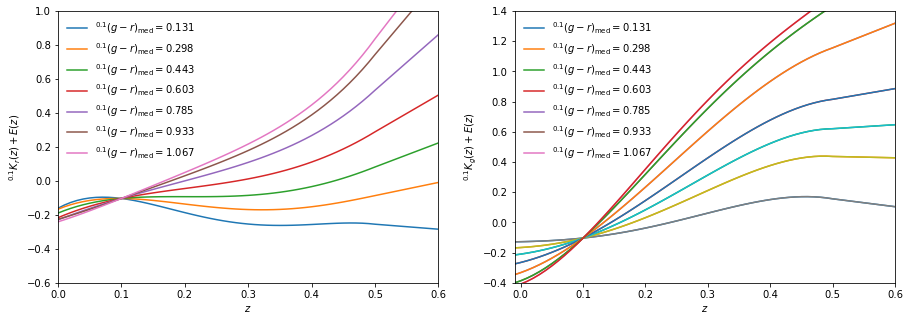

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

test_plots(axes)

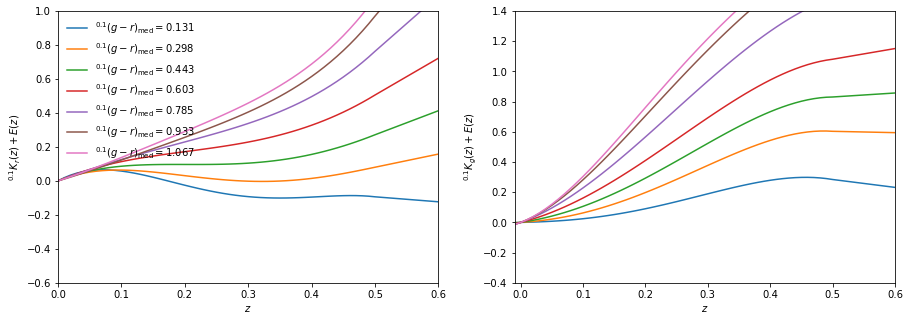

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

test_nonnative_plots(axes, 0.0)

In [6]:
gama_kE = Table.read(os.environ['CSCRATCH'] + '/norberg//GAMA4/gama_gold_kE_5k.fits')
gama_kE

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,ZMAX_THETA
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,,mag,,,,,,,,mag,,,,mag,mag,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,float32,float64,int64,int64,float64,float64,float64,float64,float64,float32,float32,float32,float64,float64,float64
585589,588848899914203328,183.48064782,-0.15822451,19.453074,0.18341,4,G12_Y6_057_054,5,21.894562,20.52974,19.453663,18.945805,18.579258,627.2877281170306,-11.012666043288846,1.0760765,0.8610029493925443,0,6,-0.004304008086476699,0.2107695500893384,0.2234659946412858,0.5710036633045628,0.7285388389050824,0.8,-0.1779077,-0.14672801,30.42018125554148,30.38900155921999,-11.163698060360842
585591,588848899914203338,183.49789499,-0.16766405,17.603594,0.12429,5,323176188157650944,6,19.758217,18.387272,17.65539,17.203344,16.9255,408.83891632496017,-11.942238857654727,0.7318821,0.6893753080282159,0,5,-0.0819652807509548,-0.03945849344225659,0.14069395795487755,0.2577107115998888,0.6148653416919028,2.12,-0.1205613,-0.2634948,29.52570002770202,29.66863351559417,-12.287698928006055
585592,588848899914203383,183.46286329,-0.08433424,18.439117,0.179,4,G12_Y3_022_187,6,21.375816,19.530548,18.330122,17.764397,17.359926,610.4904174319889,-11.07160574286307,1.2004261,0.9721022317088284,0,7,0.0058391854325142295,0.23416305540825627,0.2365374787937211,0.6269925037399601,0.8099710767383314,0.8,-0.17363001,-0.14320001,29.447815709771902,29.41738570577124,-11.20896656749182
585600,588848899914203456,183.42823656,-0.02442331,19.335196,0.12242,4,G12_Y1_GND1_018,6,20.904034,19.648397,19.229986,18.944212,18.885782,402.17133436591314,-11.977944439586118,0.41841125,0.3893481424147275,0,3,-0.10094461324771158,-0.07188150077962656,0.08028614792542539,0.12193705781293117,0.37676034499530675,2.12,-0.1187474,-0.2595304,31.351601231299785,31.492384228311924,-12.338419448103224
585603,588848899914203511,183.50219516,-0.16954766,19.42929,0.08914,4,G12_Y3_022_170,5,20.404564,19.604887,19.355776,19.150723,19.380806,286.07271379559756,-12.717617820605575,0.24911118,0.25921542614595333,0,2,-0.10249707668751229,-0.11260132729635533,0.06318190720727612,0.04488036604559115,0.26741271669879435,2.12,-0.0864658,-0.18897678,32.17019248320106,32.27270346446279,-13.009091676873204
585607,588848899914268848,183.60160175,-0.18627266,18.615673,0.18484,4,G12_Y6_057_048,6,19.831152,19.083632,18.618288,18.319872,18.317358,632.7514193386862,-10.993834359965348,0.46534348,0.3271754608358587,0,3,-0.12224092872758091,0.0159270857783622,0.04929777637773486,0.1910928313923645,0.32354842032716724,2.12,-0.1792948,-0.39186075,29.739504443571057,29.952070402070966,-11.507936041990735
585606,588848899914268827,183.57423313,-0.07826632,17.959646,0.24766,5,4330342247851098112,6,22.035128,19.377728,17.913776,17.397978,17.044468,880.8085931674992,-10.275592285196156,1.4639511,1.0187620089417166,0,7,0.1152454090575456,0.5604345109556725,0.35103175304364315,0.9608665324449894,0.8541163314384974,0.8,-0.2402302,-0.198128,28.124436959802964,28.08233475702987,-10.358474876040383
585610,588848899914268877,183.63570571,-0.18036312,18.865356,0.20493,4,G12_Y1_HN1_145,6,20.803123,19.725954,18.848455,18.497477,18.334072,710.3851067380509,-10.742530760705858,0.8774986,0.6616306307163672,0,5,-0.027243027797297995,0.1886249681953192,0.1935241661150005,0.4755138903473121,0.5955089024766728,2.12,-0.1987821,-0.43445155,29.613145141176894,29.848814590148642,-11.20422533874844


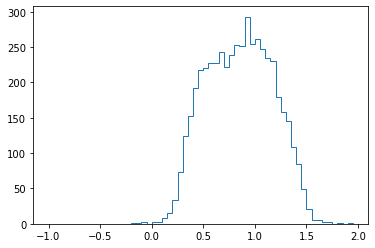

In [7]:
_ = pl.hist(gama_kE['GMR'], histtype='step', bins=np.arange(-1.0, 2.0, 0.05))

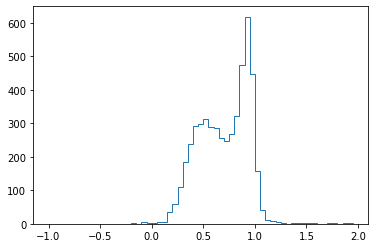

In [8]:
_ = pl.hist(gama_kE['REST_GMR_0P1'], histtype='step', bins=np.arange(-1.0, 2.0, 0.05))

In [9]:
np.unique(gama_kE['REST_GMR_0P1_WARN'].data)

array([0])

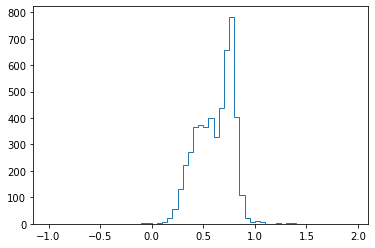

In [10]:
_ = pl.hist(gama_kE['REST_GMR_0P0'], histtype='step', bins=np.arange(-1.0, 2.0, 0.05))

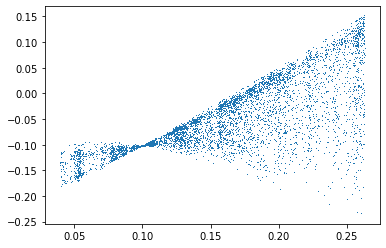

In [11]:
pl.plot(gama_kE['ZGAMA'], gama_kE['KCORR_R0P1'], marker=',', lw=0.0)

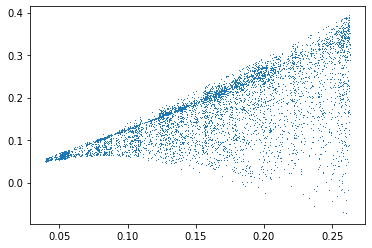

In [12]:
pl.plot(gama_kE['ZGAMA'], gama_kE['KCORR_R0P0'], marker=',', lw=0.0)

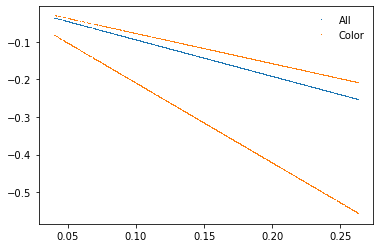

In [13]:
pl.plot(gama_kE['ZGAMA'], gama_kE['EQ_ALL_0P0'], marker=',', lw=0.0, label='All')
pl.plot(gama_kE['ZGAMA'], gama_kE['EQ_COLOR_0P0'], marker=',', lw=0.0, label='Color')
pl.legend(frameon=False)

In [14]:
np.sort(gama_kE['MALL_0P0'].data)

array([26.92890423, 27.26814698, 27.27774716, ..., 34.06538832,
       34.14169906, 34.24128488])

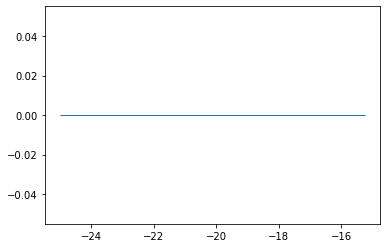

In [15]:
_ = pl.hist(gama_kE['MALL_0P0'], histtype='step', bins=np.arange(-25., -15.0, 0.25), label='All')
# _ = pl.hist(gama_kE['MCOLOR_0P0'], histtype='step', bins=np.arange(-25., -15.0, 0.25), label='Color')

# pl.legend(frameon=False)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]),
 array([-25.  , -24.75, -24.5 , -24.25, -24.  , -23.75, -23.5 , -23.25,
        -23.  , -22.75, -22.5 , -22.25, -22.  , -21.75, -21.5 , -21.25,
        -21.  , -20.75, -20.5 , -20.25, -20.  , -19.75, -19.5 , -19.25,
        -19.  , -18.75, -18.5 , -18.25, -18.  , -17.75, -17.5 , -17.25,
        -17.  , -16.75, -16.5 , -16.25, -16.  , -15.75, -15.5 , -15.25]),
 <a list of 1 Patch objects>)

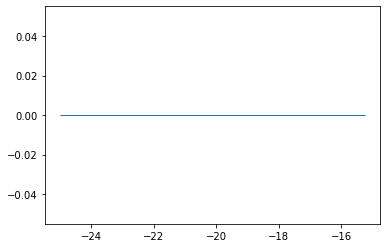

In [16]:
pl.hist(gama_kE['MALL_0P0'], histtype='step', bins=np.arange(-25., -15.0, 0.25), label='All')

/global/u2/m/mjwilson/desi/BGS/Sam/DESI/cosmo.py:11: RuntimeWarning: divide by zero encountered in log10
  return 5. * np.log10(cosmo.luminosity_distance(zs).value) - 25.


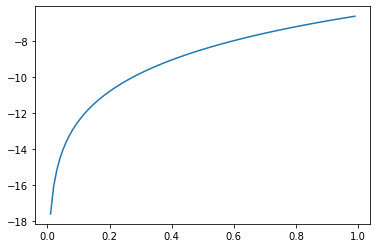

In [17]:
zs = np.arange(0.0, 1.0, 0.01)
mus = distmod(zs)

pl.plot(zs, mus)

# Done.